# Bagging 

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn import metrics

df = pd.read_csv('./house_data.csv')

y = df['建物單價元/坪']
X = df.drop(['建物單價元/坪'],axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

estimator = DecisionTreeRegressor(max_depth=6)
estimator.fit(X_train, y_train)

ensemble = BaggingRegressor(base_estimator=estimator, n_estimators=100)
ensemble.fit(X_train, y_train)

estimator_pred = estimator.predict(X_test)
ensemble_pred = ensemble.predict(X_test)

estimator_r2 = metrics.r2_score(estimator_pred, y_test)
estimator_mse = metrics.mean_squared_error(estimator_pred, y_test)

ensemble_r2 = metrics.r2_score(ensemble_pred, y_test)
ensemble_mse = metrics.mean_squared_error(ensemble_pred, y_test)


print('Bagging r-squared: {}'.format(ensemble_r2))
print('Bagging MSE: {}'.format(ensemble_mse))
print('='*100)
print('Decision Tree r-squared: {}'.format(estimator_r2))
print('Decision Tree MSE: {}'.format(estimator_mse))


Bagging r-squared: 0.6351392765009969
Bagging MSE: 206.26027952474675
Decision Tree r-squared: 0.6133844204326765
Decision Tree MSE: 234.37711015441428


# Boosting 

In [22]:
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics

df = pd.read_csv('./house_data.csv')

y = df['建物單價元/坪']
X = df.drop(['建物單價元/坪'],axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

model = AdaBoostRegressor(n_estimators=1500)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2 = metrics.r2_score(y_pred, y_test)
mse = metrics.mean_squared_error(y_pred, y_test)


print('AdaBoostRegressor:')
print('R2-squared: {}'.format(r2))
print('MSE: {}'.format(mse))

AdaBoostRegressor:
R2-squared: -1.1598827566854388
MSE: 1024.8578541448437


 # AdaBoost

In [2]:
import pandas as pd
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv('./house_data111.csv')

y = df['建物單價元/坪']
X = df.drop(['建物單價元/坪'],axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

losses = ["linear","square","exponential"] 

for loss in losses:

    model = AdaBoostRegressor(loss=loss, n_estimators=2000, learning_rate=0.01)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    r2 = r2_score(y_pred, y_test)
    mse = mean_squared_error(y_pred, y_test)

    print(loss)
    print('r2: {}'.format(r2))
    print('mse: {}'.format(mse))
    print('='*100)


linear
r2: -4.255370957057462
mse: 0.11421697800282585
square
r2: -36.69892736616994
mse: 0.13843204246396149
exponential
r2: -5.336170350818135
mse: 0.1199608388610586


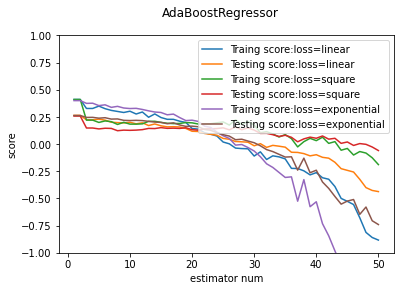

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv('./house_data.csv')

y = df['建物單價元/坪']
X = df.drop(['建物單價元/坪'],axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# X_train,X_test,y_train,y_test=data
losses=['linear','square','exponential']
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
for i ,loss in enumerate(losses):
    regr=AdaBoostRegressor(loss=loss,n_estimators=50)
    regr.fit(X_train,y_train)
    ## 绘图
    estimators_num=len(regr.estimators_)
    X=range(1,estimators_num+1)
    ax.plot(list(X),list(regr.staged_score(X_train,y_train)),label="Traing score:loss=%s"%loss)
    ax.plot(list(X),list(regr.staged_score(X_test,y_test)),label="Testing score:loss=%s"%loss)
    ax.set_xlabel("estimator num")
    ax.set_ylabel("score")
    ax.legend(loc="upper right")
    ax.set_ylim(-1,1)
plt.suptitle("AdaBoostRegressor")
plt.show()

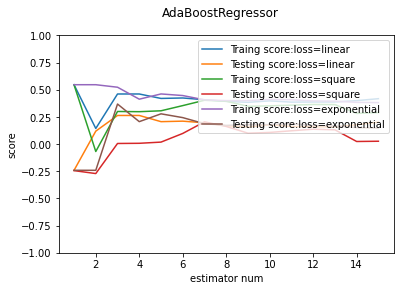

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv('./house_data.csv')

y = df['建物單價元/坪']
X = df.drop(['建物單價元/坪'],axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# X_train,X_test,y_train,y_test=data
losses=['linear','square','exponential']
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
for i ,loss in enumerate(losses):
    regr=AdaBoostRegressor(loss=loss,n_estimators=15)
    regr.fit(X_train,y_train)
    ## 绘图
    estimators_num=len(regr.estimators_)
    X=range(1,estimators_num+1)
    ax.plot(list(X),list(regr.staged_score(X_train,y_train)),label="Traing score:loss=%s"%loss)
    ax.plot(list(X),list(regr.staged_score(X_test,y_test)),label="Testing score:loss=%s"%loss)
    ax.set_xlabel("estimator num")
    ax.set_ylabel("score")
    ax.legend(loc="upper right")
    ax.set_ylim(-1,1)
plt.suptitle("AdaBoostRegressor")
plt.show()

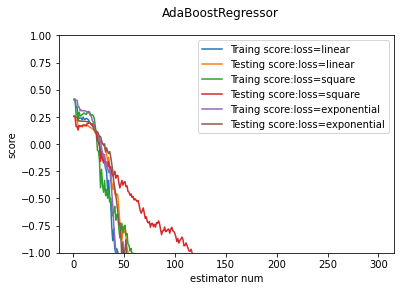

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv('./house_data.csv')

y = df['建物單價元/坪']
X = df.drop(['建物單價元/坪'],axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# X_train,X_test,y_train,y_test=data
losses=['linear','square','exponential']
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
for i ,loss in enumerate(losses):
    regr=AdaBoostRegressor(loss=loss,n_estimators=300)
    regr.fit(X_train,y_train)
    ## 绘图
    estimators_num=len(regr.estimators_)
    X=range(1,estimators_num+1)
    ax.plot(list(X),list(regr.staged_score(X_train,y_train)),label="Traing score:loss=%s"%loss)
    ax.plot(list(X),list(regr.staged_score(X_test,y_test)),label="Testing score:loss=%s"%loss)
    ax.set_xlabel("estimator num")
    ax.set_ylabel("score")
    ax.legend(loc="upper right")
    ax.set_ylim(-1,1)
plt.suptitle("AdaBoostRegressor")
plt.show()

# XGBOOST (SVM演化過來) 

In [8]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv('./house_data111.csv')

y = df['建物單價元/坪']
X = df.drop(['建物單價元/坪'],axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

model = xgb.XGBRegressor( n_estimators=300, reg_lambda=1, gamma=0, max_depth=15) #預設使用DecisionTreeRegressor
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

men = mean_squared_error(y_pred, y_test)
r2 = r2_score(y_pred, y_test)

print('r2: {}'.format(r2))
print('mse: {}'.format(men))

r2: 0.43267333067732905
mse: 0.06354417558141205


In [7]:
from joblib import dump, load  ####把跑完的模型存下來!!!!!!
dump(model, 'XGBOOST_model.joblib') ####模型儲存的位子!!!!!!

['XGBOOST_model.joblib']

In [4]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv('./house_data.csv')

y = df['建物單價元/坪']
X = df.drop(['建物單價元/坪'],axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

model = xgb.XGBRFRegressor(n_estimators=200, max_depth=6) #預設使用RF
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

men = mean_squared_error(y_pred, y_test)
r2 = r2_score(y_pred, y_test)

print('r2: {}'.format(r2))
print('mse: {}'.format(men))

r2: 0.43614038340013395
mse: 504.21490090184625
